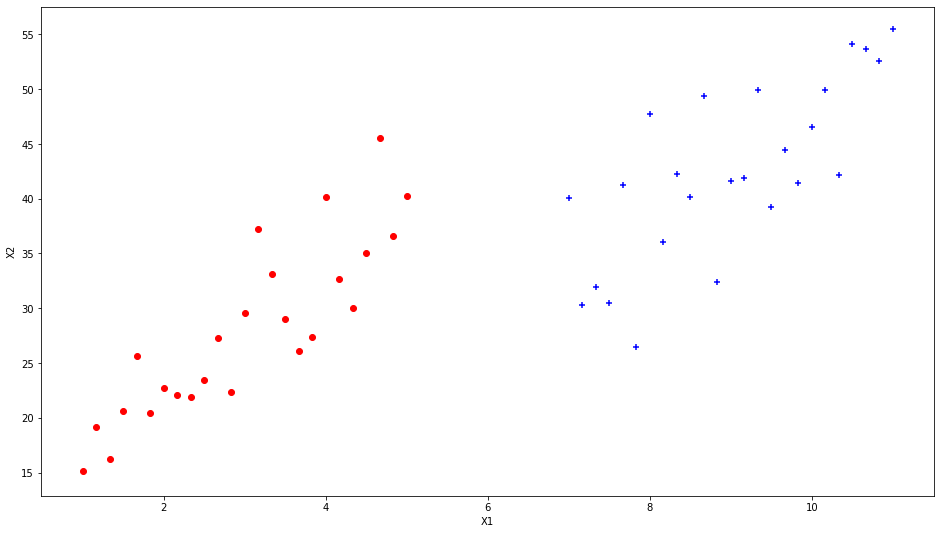

In [246]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

# randomly generated data, just for test
np.random.seed(1)
x1 = np.linspace(7, 11, 25)
y1 = 6 * x1 -12 + 3 * np.sin(x1) + 5 * np.random.randn(len(x1))

x2  = np.linspace(1, 5, 25)
y2 = 6 * x2 + 10 +  3 * np.sin(x2) + 5 * np.random.randn(len(x2))

plt.figure(figsize=(16, 9))
plt.scatter(x1, y1, marker='+', color='b')
plt.scatter(x2, y2, marker='o', color='r')
plt.xlabel('X1')
plt.ylabel('X2')

dataset1 = np.c_[x1, y1, np.ones(len(x1))]
dataset2 = np.c_[x2, y2, -np.ones(len(x2))]
dataset = np.r_[dataset1, dataset2]
dataset = np.c_[np.ones(len(dataset)), dataset]

np.random.shuffle(dataset)
X = dataset[:, :-1]
y = dataset[:, -1]

pos_dataset = X[y == 1]
neg_dataset = X[y == -1]

***

In [247]:
df = pd.read_csv('ds2_train.csv')
df.head()
dataset = df.to_numpy()
np.random.shuffle(dataset)
X = dataset[:, :-1]
y = dataset[:, -1].astype('int32')
X = np.c_[np.ones(len(X)), X]
y[y == 0] = -1

pos_dataset = X[y == 1]
neg_dataset = X[y == -1]

training set X shape = (800, 3)
training set y shape = (800,)
loss = 10.0
dw = [ 0.         -0.46520653  0.54979824]


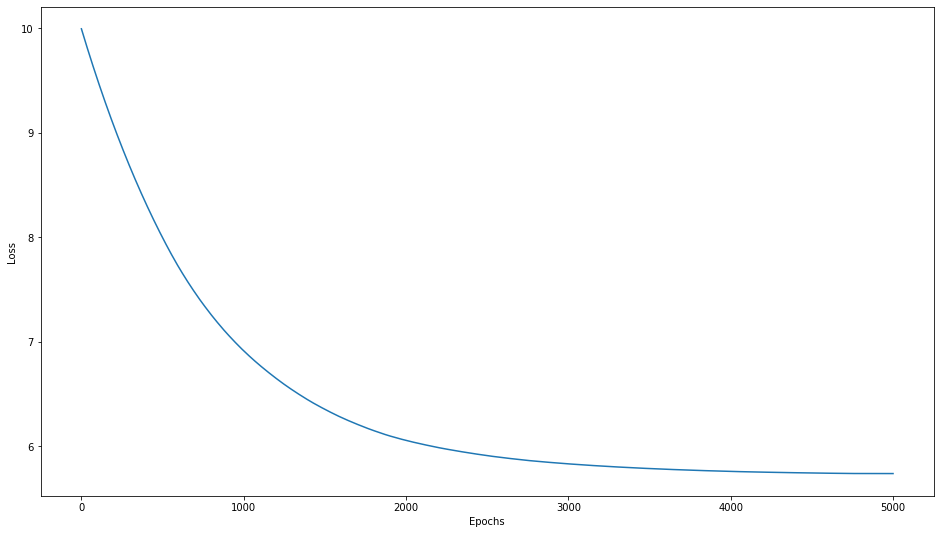

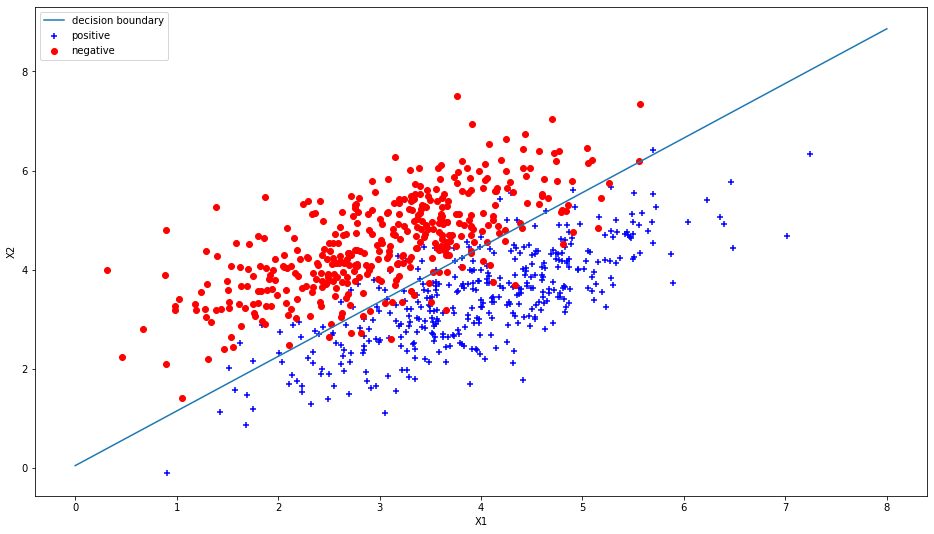

In [248]:
print('training set X shape =', X.shape)
print('training set y shape =', y.shape)

reg_strength = 10
weights = np.zeros(X.shape[1])

def compute_cost(X, y, weights, reg_strength):
    distance = 1 - y * np.dot(X, weights)
    distance[distance < 0] = 0
    hinge_loss = reg_strength * np.mean(distance)
    
    return 0.5 * np.dot(weights, weights) + hinge_loss

loss = compute_cost(X, y, weights, reg_strength)
print('loss =', loss)

def compute_cost_gradient(X, y, weights, reg_strength):
    dw = np.zeros(np.shape(weights))
    distances = 1 - y * np.dot(X, weights)
    for idx, distance in enumerate(distances):
        if distance <= 0:
            dw += weights
        else:
            dw += weights - y[idx] * X[idx]
    return dw / len(X)

dw = compute_cost_gradient(X, y, weights, reg_strength)
print('dw =', dw)

epochs = 5000
alpha = 0.001
costs = []

for i in range(epochs):
    dw = compute_cost_gradient(X, y, weights, reg_strength)
    weights -= alpha * dw
    cost = compute_cost(X, y, weights, reg_strength)
    costs.append(cost)

    
plt.figure(figsize=(16, 9))
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Loss')

xx = np.linspace(0, 8, 20)
yy = -(weights[0] + weights[1] * xx) / weights[2]

plt.figure(figsize=(16, 9))
plt.scatter(pos_dataset[:, 1], pos_dataset[:, 2], marker='+', color='b', label='positive')
plt.scatter(neg_dataset[:, 1], neg_dataset[:, 2], marker='o', color='r', label='negative')
plt.plot(xx, yy, label='decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

In [238]:
y_hat = np.sign(np.dot(X, weights))
print('training accuracy:', np.sum(y_hat == y) / len(y))

df = pd.read_csv('ds2_valid.csv')
df.head()
dataset = df.to_numpy()
val_X = dataset[:, :-1]
val_X = np.c_[np.ones(len(val_X)), val_X]
val_y = dataset[:, -1].astype('int32')
val_y[val_y == 0] = -1
y_hat = np.sign(np.dot(val_X, weights))
print('validation accuracy:', np.sum(y_hat == val_y) / len(val_y))


df = pd.read_csv('ds2_test.csv')
df.head()
dataset = df.to_numpy()
test_X = dataset[:, :-1]
test_X = np.c_[np.ones(len(test_X)), test_X]
test_y = dataset[:, -1].astype('int32')
test_y[test_y == 0] = -1
y_hat = np.sign(np.dot(test_X, weights))
print('test accuracy:', np.sum(y_hat == test_y) / len(test_y))

training accuracy: 0.90375
validation accuracy: 0.91
test accuracy: 0.93
